In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import utils
import time
from astropy.io import fits



$\textbf{Quasi-Redundat Visibility Monte Carlo Simulation}$

In [26]:
#N_
datafile_1pec = np.load('SB_Visibilitity_simulation_GB_GLEAM_BSRC__position_error_1perc_72_200MHz.npy')
datafile_10pec = np.load('SB_Visibilitity_simulation_GB_GLEAM_BSRC__position_error_10perc_72_200MHz.npy')
datafile_100pec = np.load('SB_Visibilitity_simulation_GB_GLEAM_BSRC__position_error_100perc_72_200MHz.npy')

vis_rel_error_1pc = np.array(datafile_1pec[1])
vis_rel_error_10pc= np.array(datafile_10pec[1])
vis_rel_error_100pc = np.array(datafile_100pec[1])


$\textbf{Visibility Relative Error at 150 MHz}$

<IPython.core.display.Javascript object>


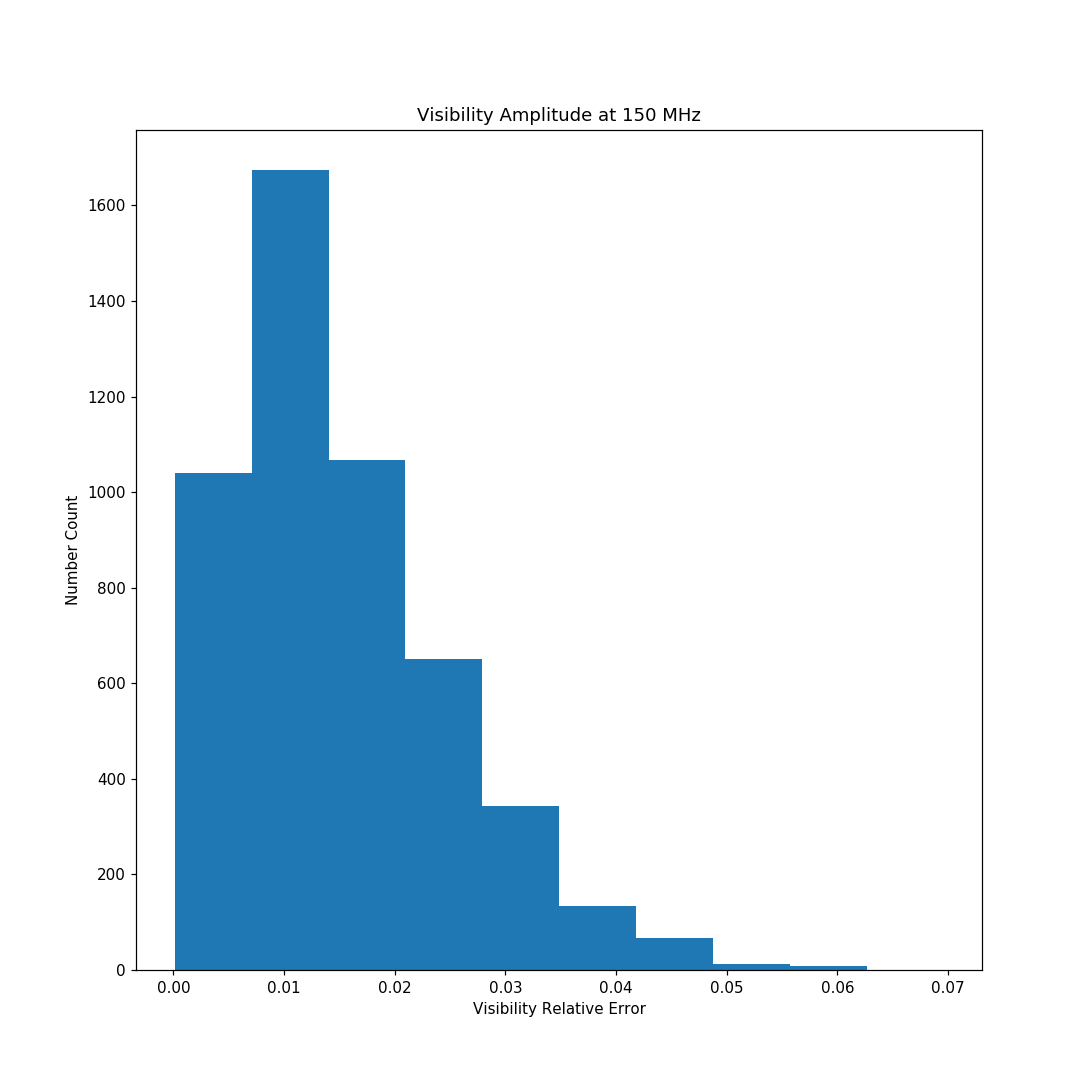

<IPython.core.display.Javascript object>


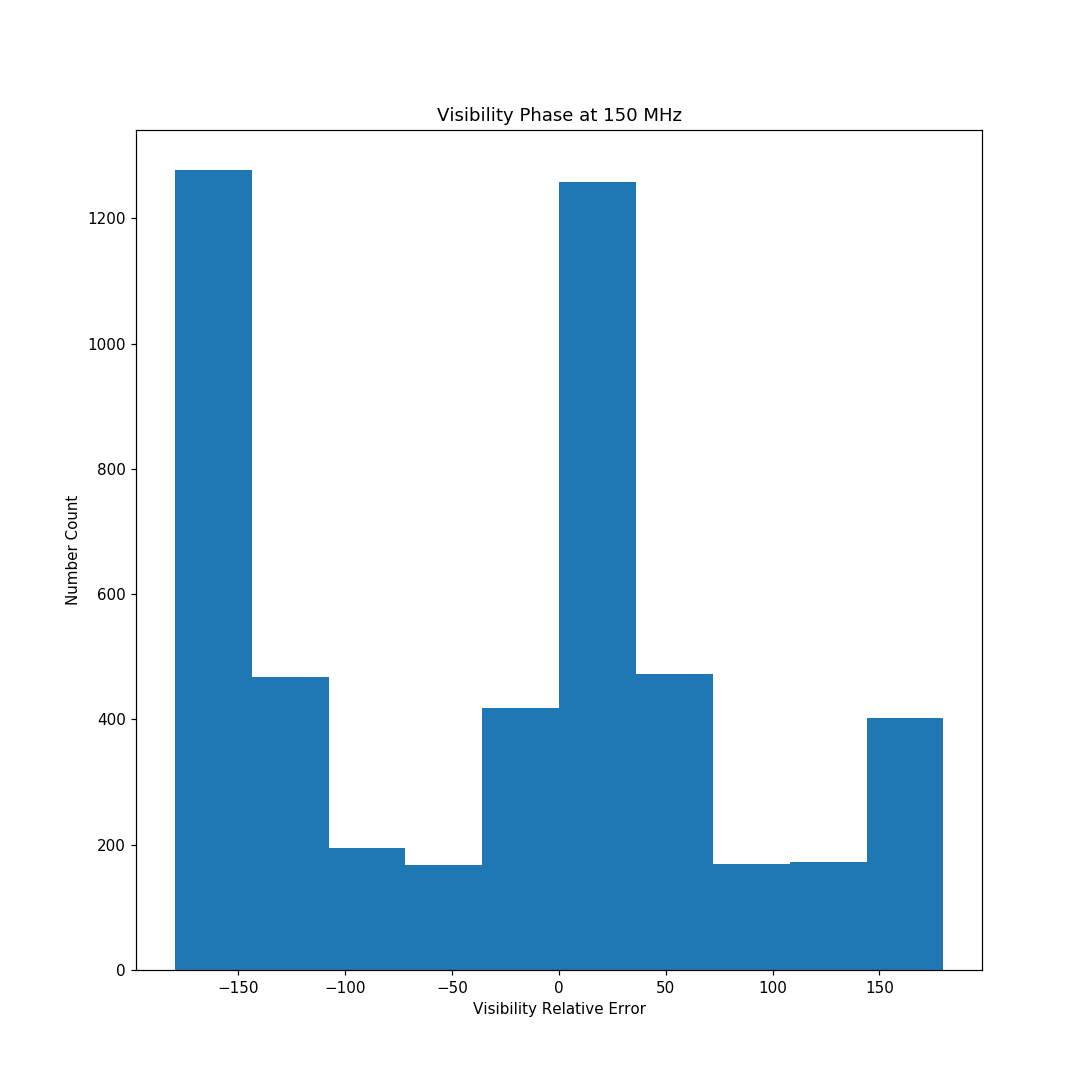

In [27]:
plt.figure(figsize=(10,10))
plt.title('Visibility Amplitude at 150 MHz')
plt.hist(np.abs(vis_rel_error_1pc[:,78]))
plt.ylabel('Number Count')
plt.xlabel('Visibility Relative Error')
plt.show()

plt.figure(figsize=(10,10))
plt.title('Visibility Phase at 150 MHz')
plt.hist(np.angle(vis_rel_error_1pc[:,78],deg=True))
plt.ylabel('Number Count')
plt.xlabel(r'Visibility Relative Error')
plt.show()

$\textbf{Standard Deviation of Visibility Relative Error | Position Errors}$

In [5]:
std_vis_rel_error_1pc = np.array([np.std(vis_rel_error_1pc[:,freq_i]) for freq_i in range(vis_rel_error_1pc.shape[1])])
std_vis_rel_error_10pc = np.array([np.std(vis_rel_error_10pc[:,freq_i]) for freq_i in range(vis_rel_error_10pc.shape[1])])
std_vis_rel_error_100pc = np.array([np.std(vis_rel_error_100pc[:,freq_i]) for freq_i in range(vis_rel_error_100pc.shape[1])])
freq =np.arange(72.0,200.0,1.0)


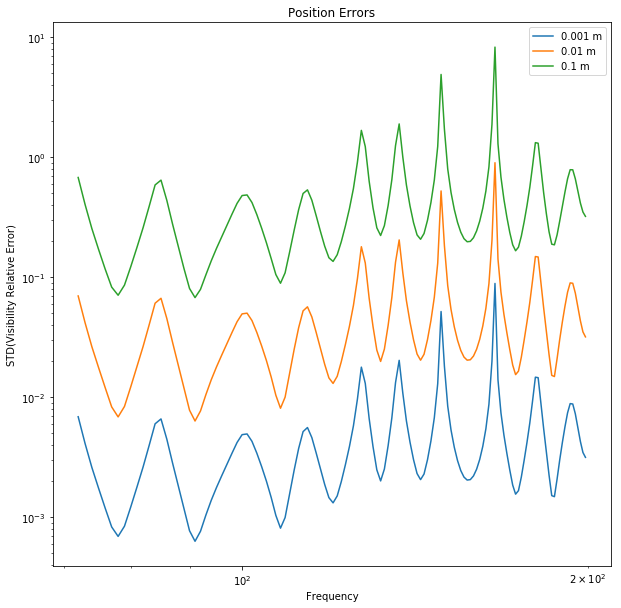

In [6]:
plt.figure(figsize=(10,10))
plt.title('Position Errors')
plt.loglog(freq,std_vis_rel_error_1pc,label='0.001 m')
plt.loglog(freq,std_vis_rel_error_10pc,label='0.01 m')
plt.loglog(freq,std_vis_rel_error_100pc,label='0.1 m')
plt.xlabel('Frequency')
plt.ylabel(r'STD(Visibility Relative Error)')
plt.legend(loc='best')
plt.show()


$\textbf{Standard Deviation of Visibility Relative Error | Beam Pointing Errors}$

In [7]:
dfile_1pc =np.load('SB_Visibilitity_simulation_GB_GLEAM_BSRC_beam_error_1perc_72_200MHz.npy')
dfile_10pc =np.load('SB_Visibilitity_simulation_GB_GLEAM_BSRC_beam_error_10perc_72_200MHz.npy')
dfile_100pc =np.load('SB_Visibilitity_simulation_GB_GLEAM_BSRC_beam_error_100perc_72_200MHz.npy')

vis_pt_error_1pc,vis_pt_error_10pc,vis_pt_error_100pc = dfile_1pc[1], dfile_10pc[1], dfile_100pc[1]

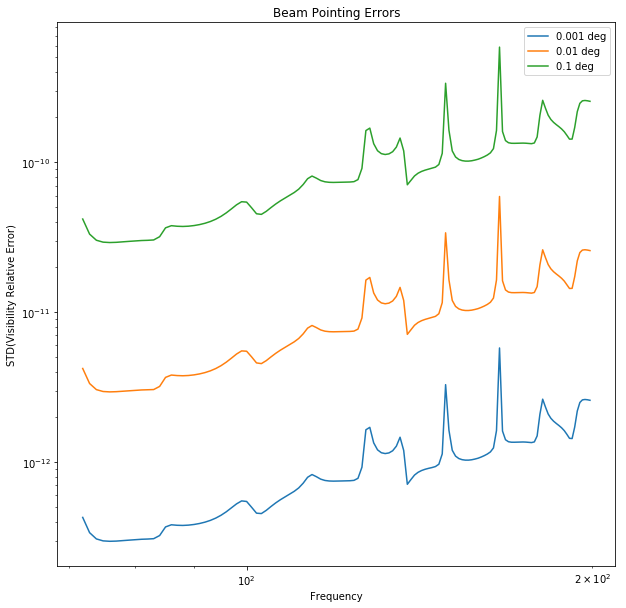

In [8]:
std_vis_pt_error_1pc = np.array([np.std(vis_pt_error_1pc[:,freq_i]) for freq_i in range(vis_pt_error_1pc.shape[1])])
std_vis_pt_error_10pc = np.array([np.std(vis_pt_error_10pc[:,freq_i]) for freq_i in range(vis_pt_error_10pc.shape[1])])
std_vis_pt_error_100pc = np.array([np.std(vis_pt_error_100pc[:,freq_i]) for freq_i in range(vis_pt_error_100pc.shape[1])])



plt.figure(figsize=(10,10))
plt.title('Beam Pointing Errors')
plt.loglog(freq,std_vis_pt_error_1pc,label='0.001 deg')
plt.loglog(freq,std_vis_pt_error_10pc,label='0.01 deg')
plt.loglog(freq,std_vis_pt_error_100pc,label='0.1 deg')
plt.xlabel('Frequency')
plt.ylabel(r'STD(Visibility Relative Error)')
plt.legend(loc='best')
plt.show()


$\textbf{Standard Deviation of Visibility Relative Error | Beam Size Errors}$

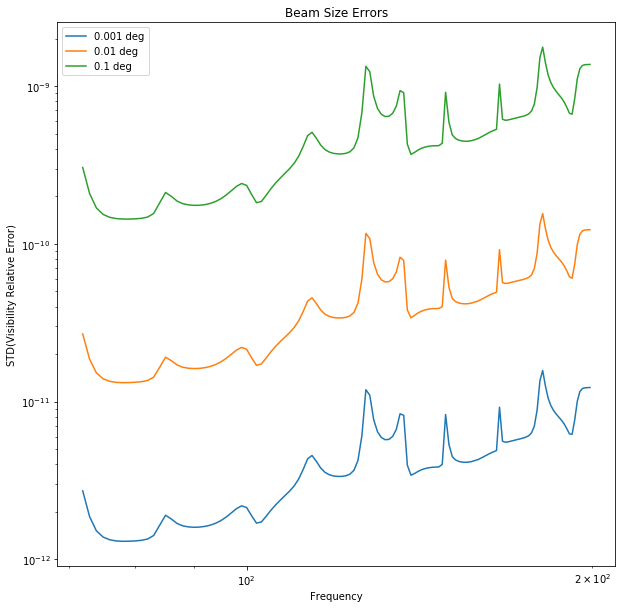

In [9]:
vis_bs_error_1pc,vis_bs_error_10pc,vis_bs_error_100pc = dfile_1pc[3], dfile_10pc[3], dfile_100pc[3]

std_vis_bs_error_1pc = np.array([np.std(vis_bs_error_1pc[:,freq_i]) for freq_i in range(vis_bs_error_1pc.shape[1])])
std_vis_bs_error_10pc = np.array([np.std(vis_bs_error_10pc[:,freq_i]) for freq_i in range(vis_bs_error_10pc.shape[1])])
std_vis_bs_error_100pc = np.array([np.std(vis_bs_error_100pc[:,freq_i]) for freq_i in range(vis_bs_error_100pc.shape[1])])



plt.figure(figsize=(10,10))
plt.title('Beam Size Errors')
plt.loglog(freq,std_vis_bs_error_1pc,label='0.001 deg')
plt.loglog(freq,std_vis_bs_error_10pc,label='0.01 deg')
plt.loglog(freq,std_vis_bs_error_100pc,label='0.1 deg')
plt.xlabel('Frequency')
plt.ylabel(r'STD(Visibility Relative Error)')
plt.legend(loc='best')
plt.show()



$\textbf{ 1-D Delay PowerSpectrum}$